In [40]:
import numpy as np
import json
import matplotlib.pyplot as plt
import scipy.stats as stats

In [68]:
#ped_file = '../../DATA/ssc.hg38/ssc.ped'
ped_file = '../../DATA/ihart.ms2/ihart.ped.quads.ped'

In [69]:
#with open('../ssc.hg38/deletions.json', 'r') as f:
with open('../ihart.ms2/deletions.json', 'r') as f:
    deletions = json.load(f)

In [70]:
sample_to_affected = dict()
with open(ped_file, 'r') as f:
    for line in f:
        pieces = line.strip().split('\t')
        sample_to_affected[pieces[1]] = pieces[5]

In [71]:
print(len(deletions))

427774


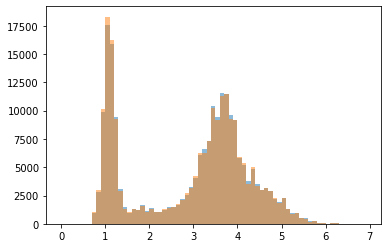

In [72]:
plt.hist(np.log10([d['length'] for d in deletions if d['is_mat']]), bins=np.arange(0, 7, 0.1), alpha=0.5)
plt.hist(np.log10([d['length'] for d in deletions if d['is_pat']]), bins=np.arange(0, 7, 0.1), alpha=0.5)
plt.show()

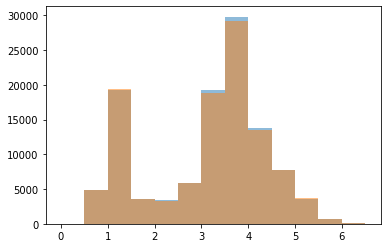

In [77]:
plt.hist(np.log10([d['length'] for d in deletions if d['is_mat'] and len(d['trans'])==1]), bins=np.arange(0, 7, 0.5), alpha=0.5)
plt.hist(np.log10([d['length'] for d in deletions if d['is_pat'] and len(d['trans'])==1]), bins=np.arange(0, 7, 0.5), alpha=0.5)
plt.show()

In [73]:
print(deletions[0])

{'family': 'AU1047.AU1047301.AU1047302', 'chrom': '18', 'start_pos': 10679, 'end_pos': 63490, 'length': 52812, 'opt_start_pos': 10679, 'opt_end_pos': 63798, 'trans': ['AU1047301'], 'notrans': ['AU1047302'], 'family_size': 4, 'is_mat': True, 'is_pat': False, 'mother': 'AU1047202', 'father': 'AU1047201', 'is_denovo': False, 'is_inherited': True, 'quality_score': None, 'is_hts': False}


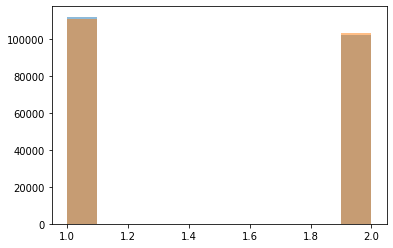

In [74]:
plt.hist([len(d['trans']) for d in deletions if d['is_mat']], alpha=0.5)
plt.hist([len(d['trans']) for d in deletions if d['is_pat']], alpha=0.5)
plt.show()

In [75]:
x = len([x for x in deletions if x['is_mat'] and len(x['trans'])==1 and x['length']<100])
y = len([x for x in deletions if x['is_pat'] and len(x['trans'])==1 and x['length']<100])
print(x, y, stats.binom_test([x, y]))

x = len([x for x in deletions if x['is_mat'] and x['length']>100])
y = len([x for x in deletions if x['is_pat'] and x['length']>100])
print(x, y, stats.binom_test([x, y]))

27592 27754 0.49375006500435575
146493 145433 0.049993758017997776


In [ ]:
# ihart 84280 83134 0.005135515277722183
# ssc 108654 110428 0.00015187752517273573
# ssc 193531 195081 0.012961932540132342

In [55]:
print(stats.binom_test([122747, 124620]))
print(stats.binom_test([111908, 110919]))

0.00016729068524225208
0.0363472794414628
